In [1]:
%matplotlib inline
import numpy as np
import torch
from mpl_toolkits import mplot3d
from d2l import torch as d2l

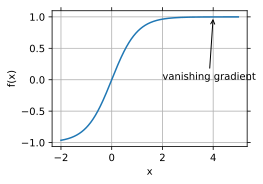

In [2]:
x = torch.arange(-2.0, 5.0, 0.01)
d2l.plot(x, torch.tanh(x), 'x', 'f(x)')
d2l.annotate('vanishing gradient', (4, 1), (2, 0.0))

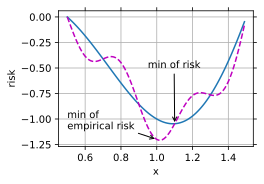

In [3]:
def f(x):
    return x * torch.cos(np.pi * x)

def g(x):
    return f(x) + 0.2 * torch.cos(5 * np.pi * x)

x = torch.arange(0.5, 1.5, 0.01)
d2l.set_figsize((4.5, 2.5))
d2l.plot(x, [f(x), g(x)], 'x', 'risk')
d2l.annotate('min of\nempirical risk', (1.0, -1.2), (0.5, -1.1))
d2l.annotate('min of risk', (1.1, -1.05), (0.95, -0.5))

Text(0.5, 0, 'y')

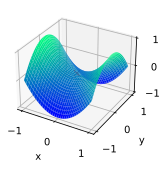

In [14]:
x, y = torch.meshgrid(torch.linspace(-1.0, 1.0, 101),
                      torch.linspace(-1.0, 1.0, 101))
z = x**2 - y**2

ax = d2l.plt.figure().add_subplot(111, projection='3d')
# ax.plot_wireframe(x, y, z, **{'rstride': 10, 'cstride': 10})
ax.plot_surface(x.numpy(), y.numpy(), z.numpy(), cmap=d2l.plt.cm.winter)
ax.plot([0], [0], [0], 'rx')
ticks = [-1, 0, 1]
d2l.plt.xticks(ticks)
d2l.plt.yticks(ticks)
ax.set_zticks(ticks)
d2l.plt.xlabel('x')
d2l.plt.ylabel('y')

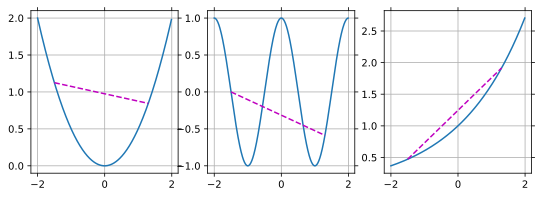

In [19]:
f = lambda x: 0.5 * x**2  # Convex
g = lambda x: torch.cos(np.pi * x)  # Nonconvex
h = lambda x: torch.exp(0.5 * x)  # Convex

x, segment = torch.arange(-2, 2, 0.01), torch.tensor([-1.5, 1.3])
d2l.use_svg_display()

_, axes = d2l.plt.subplots(1, 3, figsize=(9, 3))
for ax, func in zip(axes, [f, g, h]):
    d2l.plot([x, segment], [func(x), func(segment)], axes = ax)

epoch 20, x1: -0.288230, x2: -5.000000


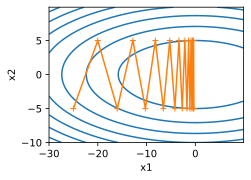

In [20]:
def show_trace_2d(f, results):
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-+', color='#ff7f0e')
    x1, x2 = d2l.meshgrid(d2l.arange(-30, 10.0, 0.1),
                          d2l.arange(-10.0, 10.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

def train_2d(trainer, steps=20, f_grad=None):
    """Optimize a 2D objective function with a customized trainer."""
    # `s1` and `s2` are internal state variables that will be used later
    x1, x2, s1, s2 = -25, -5, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def f_2d(x1, x2):  # Objective function
    return x1**2 + 10 * x2**2

def f_2d_grad(x1, x2):  # Gradient of the objective function
    return (2 * x1, 20 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))